**Collecting Data**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import shutil
import os

source = r'/content/gdrive/MyDrive/resistance prediction dataset.zip'
destination = r'/content/resistance prediction dataset.zip'
shutil.copyfile(source, destination)

'/content/resistance prediction dataset.zip'

In [4]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

**Explore data & preprocessing**

In [5]:
path = r'/content/resistance prediction dataset/'
categories= os.listdir(path)
categories

['4 more days', '8 more days', '2 more days', '10 more days', '6 more days']

In [6]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} directory : {} file ".format(categorie, count_num_file(path,categorie)))

4 more days directory : 691 file 
8 more days directory : 102 file 
2 more days directory : 42 file 
10 more days directory : 340 file 
6 more days directory : 245 file 


**Image Augmentation**
Because 1 days before directory have small number of file, so we add more augmentation on that directory. 

In [7]:
import os
from PIL import Image 
path_rotate = r'/content/resistance prediction dataset/2 more days/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(50).save(path_rotate+'rotate_50'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(65).save(path_rotate+'rotate_65'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(125).save(path_rotate+'rotate_125'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(225).save(path_rotate+'rotate_225'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)

In [8]:
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))

4 more days folder : 691 file 
8 more days folder : 102 file 
2 more days folder : 42 file 
10 more days folder : 340 file 
6 more days folder : 245 file 


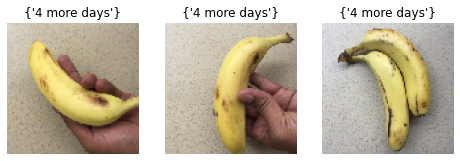

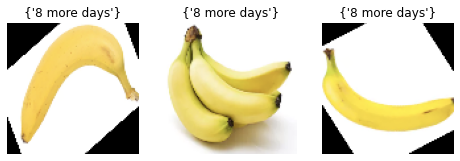

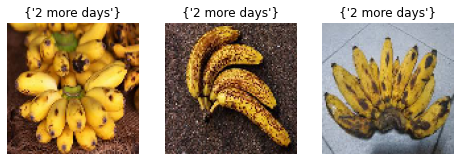

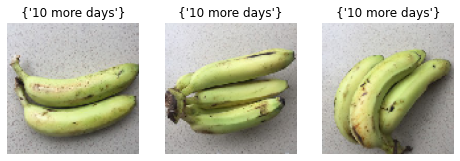

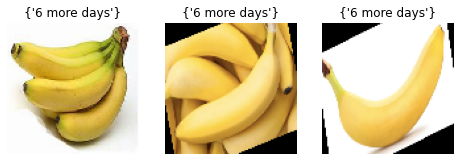

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
 
  select_img= np.random.choice(img, 3, replace = False)

  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,                 
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1137 images belonging to 5 classes.
Found 283 images belonging to 5 classes.


**Create model with transfer learning from Inception V3**

In [12]:

from tensorflow.keras.applications.inception_v3 import InceptionV3

# InceptionV3 model and use the weights from imagenet
#Useing the inception_v3 CNN that was trained on ImageNet data.  
base = InceptionV3(input_shape=(100,100,3), include_top = False)


87916544/87910968 [==============================] - 1s 0us/step


In [13]:
for layer in base.layers[:200]:
    layer.trainable = False
for layer in base.layers[200:]:
    layer.trainable = True

In [14]:

import tensorflow as tf
model = tf.keras.models.Sequential([
    
    base,
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
  
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 22,856,485
Trainable params: 15,856,965
Non-trainable params: 6,999,520
_________________________________________________________________


In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [16]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [18]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [19]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=100,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,earlystop],
      verbose=1)

Epoch 1/100
20/20 [==============================] - 37s 2s/step - loss: 1.2922 - accuracy: 0.5872 - val_loss: 12.9368 - val_accuracy: 0.1937

Epoch 00001: val_accuracy improved from -inf to 0.19375, saving model to best_model.h5
Epoch 2/100
20/20 [==============================] - 31s 2s/step - loss: 0.6260 - accuracy: 0.7703 - val_loss: 4.0623 - val_accuracy: 0.5063

Epoch 00002: val_accuracy improved from 0.19375 to 0.50625, saving model to best_model.h5
Epoch 3/100
20/20 [==============================] - 31s 2s/step - loss: 0.4001 - accuracy: 0.8484 - val_loss: 4.9276 - val_accuracy: 0.4563

Epoch 00003: val_accuracy did not improve from 0.50625
Epoch 4/100
20/20 [==============================] - 30s 2s/step - loss: 0.4023 - accuracy: 0.8480 - val_loss: 10.2633 - val_accuracy: 0.4125

Epoch 00004: val_accuracy did not improve from 0.50625
Epoch 5/100
20/20 [==============================] - 30s 2s/step - loss: 0.2865 - accuracy: 0.8848 - val_loss: 22.4518 - val_accuracy: 0.4812



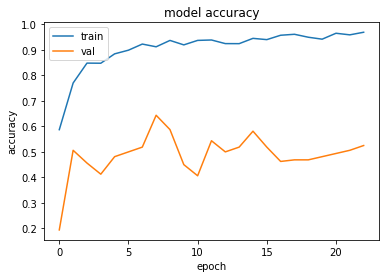

In [20]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

9/9 [==============================] - 4s 482ms/step - loss: 1.8885 - accuracy: 0.5936
Accuracy train:  0.9349164366722107
Accuracy test:  0.5936395525932312


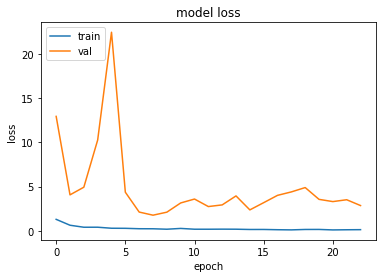

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
train_generator.class_indices


{'10 more days': 0,
 '2 more days': 1,
 '4 more days': 2,
 '6 more days': 3,
 '8 more days': 4}

Saving IMG_8702.jpg to IMG_8702.jpg
IMG_8702.jpg
[[0. 0. 0. 1. 0.]]
Best Before 7 day


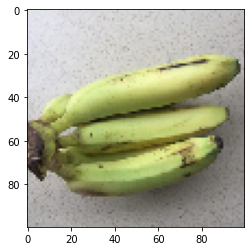

In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 
 #{'1 hari': 0, '12 hari': 1, '3 hari': 2, '7 hari': 3}
  if classes[0,0] == 1.0:
    print('Best Before 1 day')
  elif classes[0,1] == 1.0:
    print('Best Before 12 day')
  elif classes[0,2] == 1.0:
    print('Best Before 3 day')
  else:
    print('Best Before 7 day')

In [30]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 8612
drwxr-xr-x 2 root root    4096 Jun  9 14:16 assets
-rw-r--r-- 1 root root  974036 Jun  9 14:16 keras_metadata.pb
-rw-r--r-- 1 root root 7832330 Jun  9 14:16 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  9 14:16 variables


In [31]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'Orange-resistance-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Orange-resistance-prediction.txt', 'w') as f:
    f.write('\n'.join(categories))

In [32]:
try:
    files.download('Orange-resistance-prediction.tflite')
    files.download('Orange-resistance-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
# Save the trained model as a Keras HDF5 file. 

saved_model_path = "./Orange-resistance-prediction.h5"

model.save(saved_model_path)